In [2]:
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt

# **Import Data**

In [114]:
data = pd.read_csv("datas/frmgham2.csv")

In [115]:
data

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212,1,173.0,46,126.0,82.0,0,0.0,19.17,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11623,9998212,1,153.0,52,143.0,89.0,0,0.0,25.74,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11624,9999312,2,196.0,39,133.0,86.0,1,30.0,20.91,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201
11625,9999312,2,240.0,46,138.0,79.0,1,20.0,26.39,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201


# First analysis

* Extraction by sex and period
* Generate descriptive statistics of each period and each sex

## First period analysis

In [5]:
man_period_1 = data.loc[ (data.SEX == 1) & (data.PERIOD == 1), data.columns != 'RANDID' ]
man_period_1.describe().loc[:, man_period_1.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1937.000000,1944.000000,1944.000000,1944.000000,1944.000000,1928.000000,1939.000000,1944.000000,1922.000000,1943.000000,...,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,233.579763,49.786523,131.736883,83.708848,0.604424,13.227178,26.169582,0.030350,0.021852,74.397324,...,0.352881,0.722222,6507.496914,6736.198045,6654.539609,6155.881687,7003.434671,6273.698045,7193.645062,3313.345679
std,42.355966,8.719935,19.441238,11.437566,0.489100,13.780368,3.407115,0.171592,0.146239,11.903735,...,0.477989,0.448018,2929.238512,2770.552807,2815.784676,3066.851263,2509.104302,3015.175679,2385.761805,3390.769977
min,113.000000,33.000000,83.500000,48.000000,0.000000,0.000000,15.540000,0.000000,0.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,206.000000,42.000000,118.000000,76.000000,0.000000,0.000000,23.970000,0.000000,0.000000,66.000000,...,0.000000,0.000000,4574.000000,5007.250000,4832.500000,3864.000000,5609.250000,4010.000000,6053.500000,0.000000
50%,231.000000,49.000000,129.000000,82.000000,1.000000,10.500000,26.080000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8485.500000,8766.000000,8742.500000,7653.000000,8766.000000,7894.500000,8766.000000,2155.500000
75%,259.000000,57.000000,141.500000,90.000000,1.000000,20.000000,28.320000,0.000000,0.000000,80.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,6471.000000
max,696.000000,69.000000,235.000000,136.000000,1.000000,70.000000,40.380000,1.000000,1.000000,130.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [6]:
woman_period_1 = data.loc[ (data.SEX == 2) & (data.PERIOD == 1), data.columns != 'RANDID' ]
woman_period_1.describe().loc[:, woman_period_1.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,2445.000000,2490.000000,2490.000000,2490.000000,2490.000000,2474.000000,2476.000000,2490.00000,2451.000000,2490.000000,...,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000
mean,239.681391,50.034538,133.821888,82.595382,0.404016,5.645918,25.592884,0.02490,0.041616,77.056627,...,0.189157,0.742169,7209.019277,7633.872691,7600.357831,7064.610040,7539.784337,7242.856225,7749.204418,3532.130924
std,46.219672,8.643398,24.462628,12.498149,0.490799,8.955518,4.557443,0.15585,0.199750,12.150374,...,0.391712,0.437529,2558.833194,2153.806418,2197.131856,2656.316034,2262.425559,2549.011678,2037.482634,3496.114252
min,107.000000,32.000000,83.500000,50.000000,0.000000,0.000000,15.960000,0.00000,0.000000,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
25%,206.000000,43.000000,116.000000,74.000000,0.000000,0.000000,22.540000,0.00000,0.000000,69.000000,...,0.000000,0.000000,6132.000000,7541.250000,7452.750000,5618.500000,7285.750000,6244.250000,8019.750000,0.000000
50%,237.000000,49.000000,128.500000,81.000000,0.000000,0.000000,24.830000,0.00000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2218.500000
75%,269.000000,57.000000,146.500000,89.000000,1.000000,10.000000,27.820000,0.00000,0.000000,85.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7339.500000
max,600.000000,70.000000,295.000000,142.500000,1.000000,50.000000,56.800000,1.00000,1.000000,143.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


## Second period analysis

In [7]:
men_period_2 = data.loc[ (data.SEX == 1) & (data.PERIOD == 2), data.columns != 'RANDID' ]
men_period_2.describe().loc[:, men_period_2.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1666.000000,1691.000000,1691.000000,1691.000000,1691.000000,1682.000000,1685.000000,1691.000000,1654.000000,1691.000000,...,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000
mean,241.822929,55.102306,135.476937,84.608811,0.520402,12.231867,26.226481,0.043761,0.061064,75.921348,...,0.331165,0.739208,6962.490242,7213.095801,7143.768185,6608.645772,7506.645180,6746.266115,7690.318746,3507.263749
std,42.141666,8.508030,19.895327,10.906826,0.499731,15.036335,3.398327,0.204624,0.239520,12.656839,...,0.470771,0.439197,2578.156886,2344.900572,2399.528540,2784.584174,1942.007576,2696.579778,1752.146261,3410.102980
min,115.000000,39.000000,88.000000,53.000000,0.000000,0.000000,16.240000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2142.000000,0.000000
25%,214.000000,48.000000,120.000000,78.000000,0.000000,0.000000,24.050000,0.000000,0.000000,68.000000,...,0.000000,0.000000,5531.500000,6057.500000,5875.000000,4800.500000,6469.000000,5068.000000,6961.000000,0.000000
50%,240.000000,54.000000,132.000000,84.000000,1.000000,2.000000,26.090000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8365.000000,8766.000000,8744.000000,8766.000000,2245.000000
75%,266.000000,62.000000,148.000000,91.000000,1.000000,20.000000,28.230000,0.000000,0.000000,83.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,6835.000000
max,614.000000,75.000000,216.000000,124.000000,1.000000,90.000000,39.460000,1.000000,1.000000,130.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [8]:
woman_period_2 = data.loc[ (data.SEX == 2) & (data.PERIOD == 2), data.columns != 'RANDID' ]
woman_period_2.describe().loc[:, woman_period_2.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,2121.000000,2239.000000,2239.000000,2239.000000,2239.000000,2215.000000,2229.000000,2239.000000,2190.000000,2238.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,255.671381,55.664136,138.058062,83.574587,0.378294,5.972912,25.649812,0.036177,0.123288,78.356122,...,0.186244,0.753015,7488.794998,7938.919607,7903.757481,7349.100045,7836.778026,7527.014292,8038.440375,3647.227780
std,47.533067,8.562900,24.300058,11.788065,0.485070,10.003441,4.580000,0.186772,0.328842,12.760284,...,0.389390,0.431354,2258.046700,1704.386083,1762.780588,2377.332448,1857.922488,2249.737567,1557.862479,3493.148623
min,122.000000,39.000000,88.000000,47.000000,0.000000,0.000000,15.330000,0.000000,0.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2205.000000,0.000000
25%,223.000000,48.000000,121.000000,76.000000,0.000000,0.000000,22.540000,0.000000,0.000000,70.000000,...,0.000000,1.000000,6983.500000,8372.000000,8299.500000,6410.500000,8150.500000,7076.500000,8766.000000,0.000000
50%,252.000000,55.000000,134.000000,82.000000,0.000000,0.000000,24.880000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2772.000000
75%,285.000000,62.000000,151.000000,90.000000,1.000000,10.000000,27.850000,0.000000,0.000000,85.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7469.500000
max,638.000000,76.000000,282.000000,150.000000,1.000000,60.000000,56.800000,1.000000,1.000000,220.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


## Third period analysis

In [9]:
men_period_3 = data.loc[ (data.SEX == 1) & (data.PERIOD == 3), data.columns != 'RANDID' ]
men_period_3.describe().loc[:, men_period_3.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1312.000000,1387.000000,1387.000000,1387.000000,1387.000000,1380.000000,1380.000000,1387.000000,1198.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,225.742378,60.348955,139.257751,82.552992,0.388609,8.702899,26.224246,0.086518,0.115192,75.877433,...,0.319394,0.744052,7437.912040,7679.852199,7613.967556,7094.719539,7958.942322,7220.617159,8143.580389,3757.140591
std,41.127538,8.191481,21.151674,11.287367,0.487610,13.508255,3.493956,0.281228,0.319387,12.730449,...,0.466410,0.436550,2211.526503,1973.004821,2037.439626,2477.391742,1438.837473,2378.490315,1148.659623,3442.218920
min,130.000000,45.000000,91.000000,30.000000,0.000000,0.000000,14.430000,0.000000,0.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4182.000000,0.000000
25%,198.000000,53.000000,123.000000,75.000000,0.000000,0.000000,24.017500,0.000000,0.000000,66.000000,...,0.000000,0.000000,6671.000000,7202.000000,7013.500000,5965.500000,7512.500000,6187.000000,7971.500000,0.000000
50%,222.000000,60.000000,136.000000,81.500000,0.000000,0.000000,26.090000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2921.000000
75%,252.000000,67.000000,152.000000,90.000000,1.000000,20.000000,28.250000,0.000000,0.000000,85.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7409.000000
max,413.000000,80.000000,225.000000,123.000000,1.000000,80.000000,45.430000,1.000000,1.000000,150.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [10]:
woman_period_3 = data.loc[ (data.SEX == 2) & (data.PERIOD == 3), data.columns != 'RANDID' ]
woman_period_3.describe().loc[:, woman_period_3.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1737.000000,1876.000000,1876.000000,1876.000000,1876.000000,1869.000000,1866.000000,1876.000000,1619.000000,1872.000000,...,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,245.000000,60.869403,140.924041,81.231077,0.310235,5.345639,25.651125,0.071429,0.179741,78.454594,...,0.171642,0.757996,7856.707356,8297.229744,8264.591684,7705.574627,8211.607676,7896.241471,8391.336354,3891.703625
std,45.076676,8.369054,24.138008,11.229606,0.462713,9.781026,4.450496,0.257608,0.384090,12.197470,...,0.377169,0.428411,1918.701534,1165.286536,1248.120525,2083.774589,1346.849938,1883.899068,948.839775,3501.397892
min,112.000000,44.000000,86.000000,46.000000,0.000000,0.000000,14.530000,0.000000,0.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4249.000000,0.000000
25%,214.000000,54.000000,123.000000,73.000000,0.000000,0.000000,22.607500,0.000000,0.000000,70.000000,...,0.000000,1.000000,8207.750000,8766.000000,8766.000000,7576.250000,8766.000000,8344.750000,8766.000000,0.000000
50%,242.000000,60.000000,138.000000,80.000000,0.000000,0.000000,24.800000,0.000000,0.000000,77.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2955.500000
75%,270.000000,67.000000,156.000000,88.000000,1.000000,8.000000,27.940000,0.000000,0.000000,85.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7962.500000
max,625.000000,81.000000,267.000000,130.000000,1.000000,60.000000,56.800000,1.000000,1.000000,130.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


# Data visualization

In [120]:
data['SEX'].where(data.SEX != 2, 0, inplace = True)

<ipython-input-124-ffdd5bc6e1f4>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))


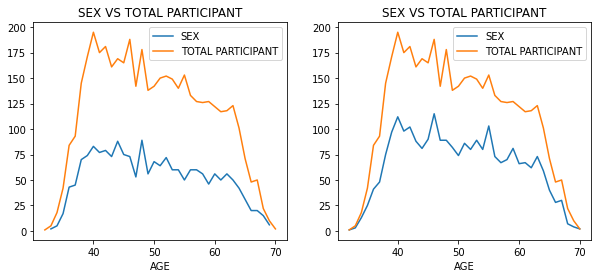

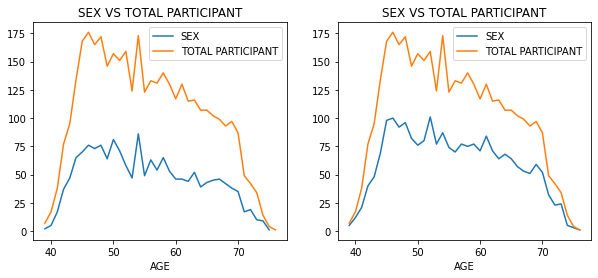

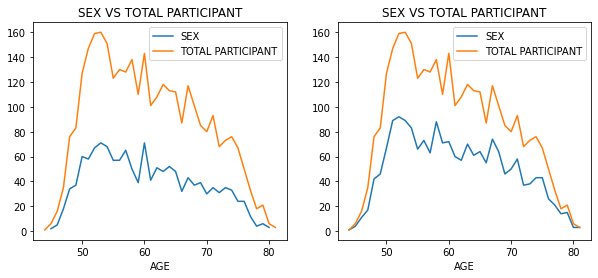

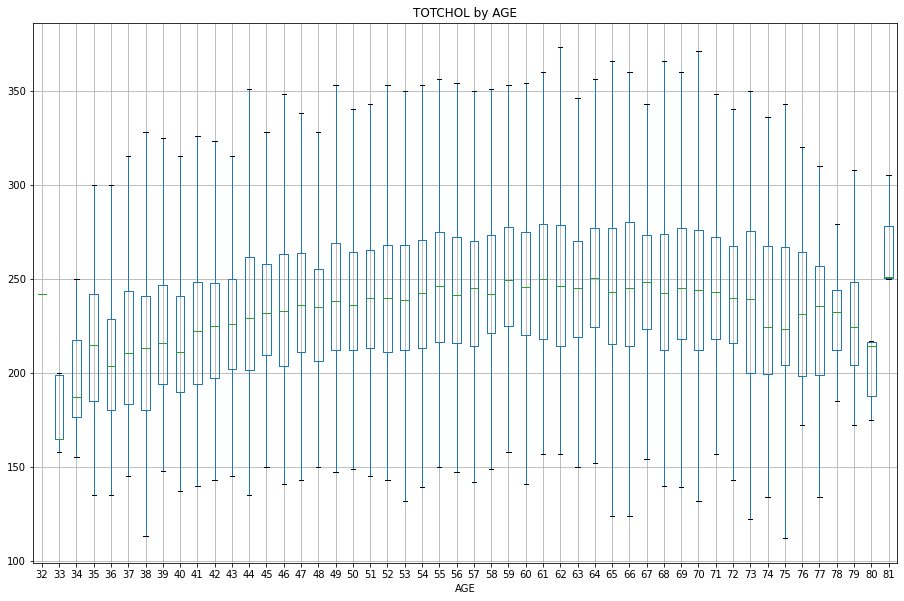

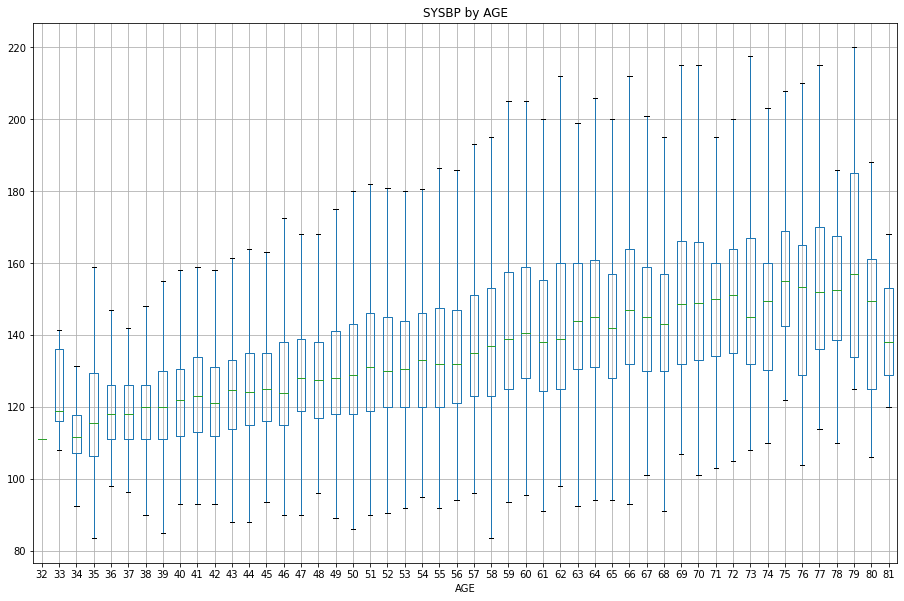

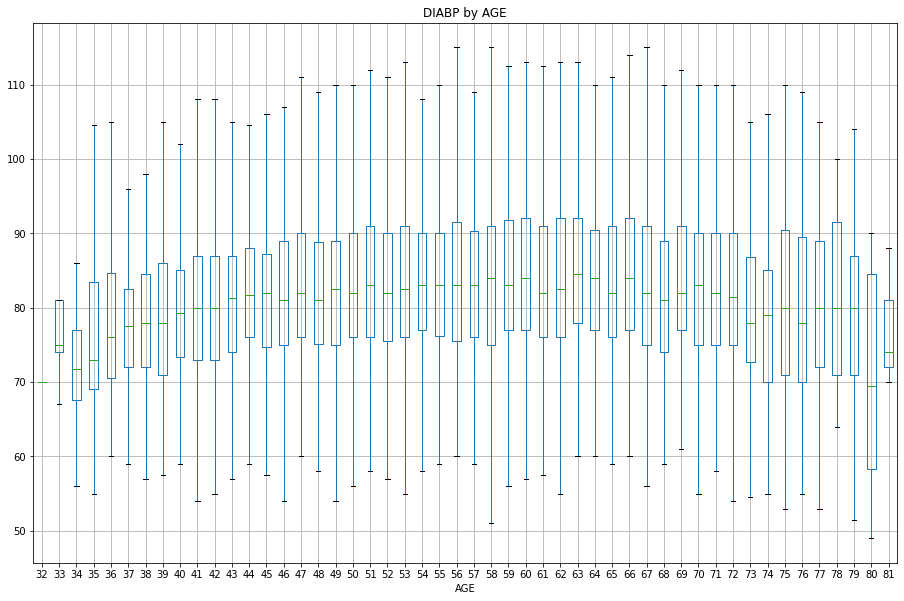

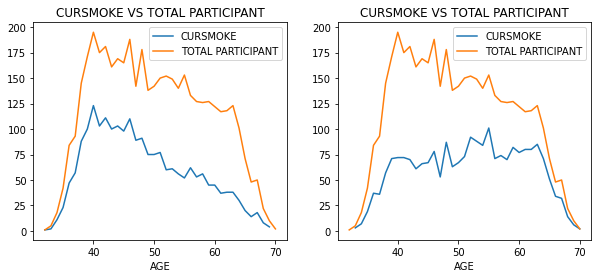

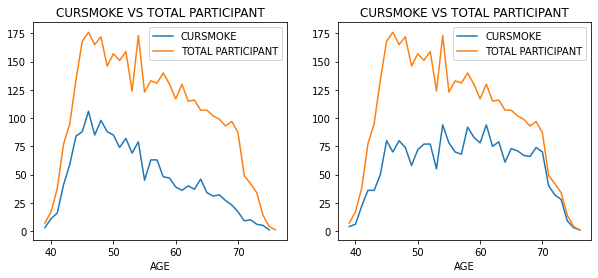

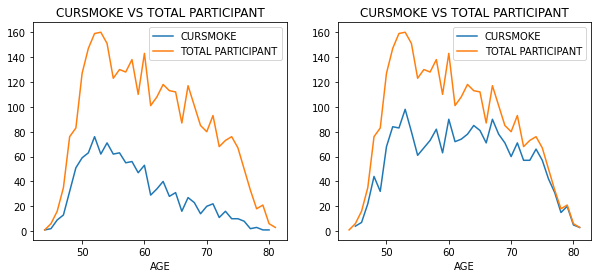

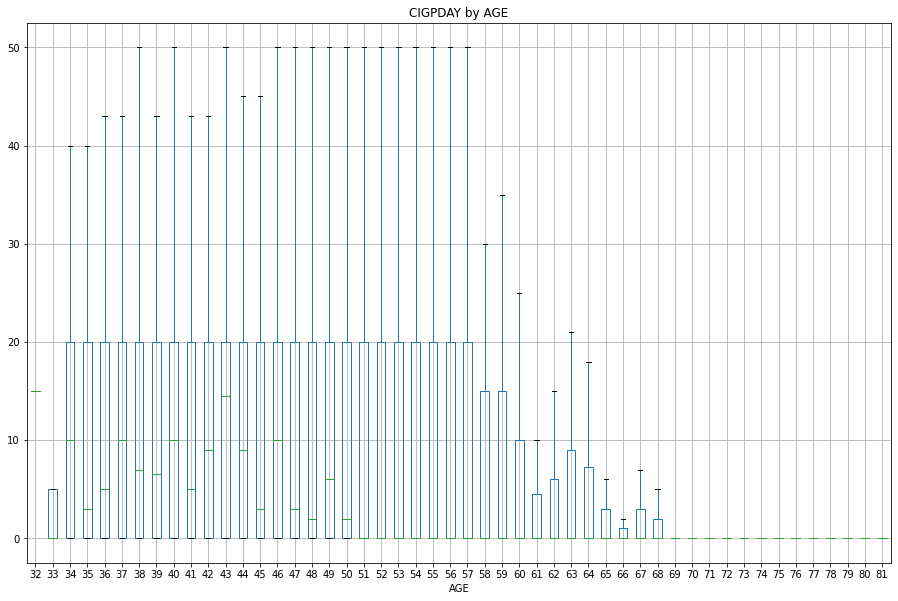

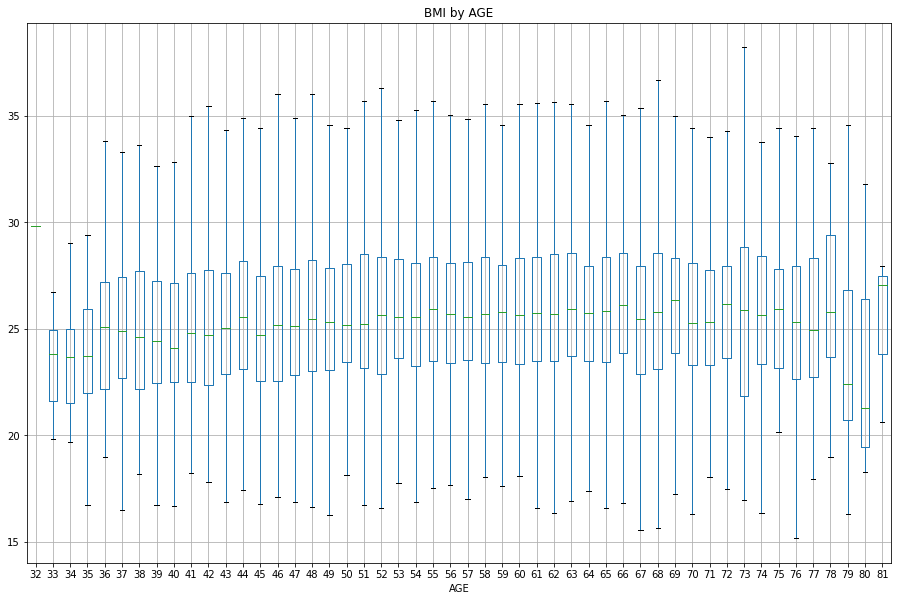

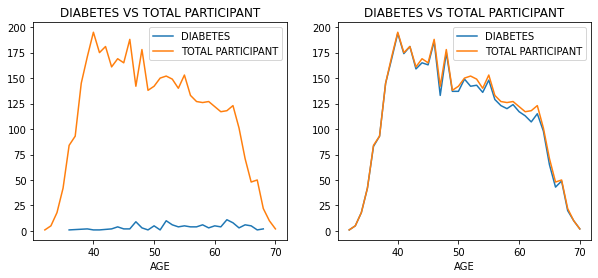

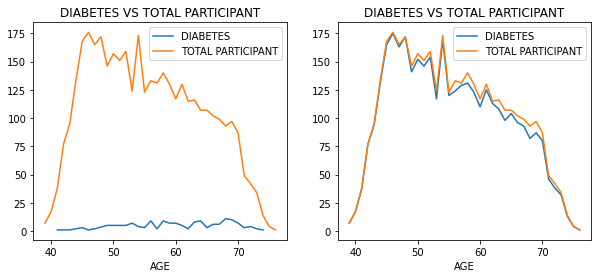

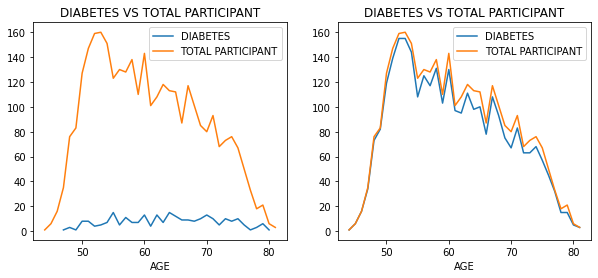

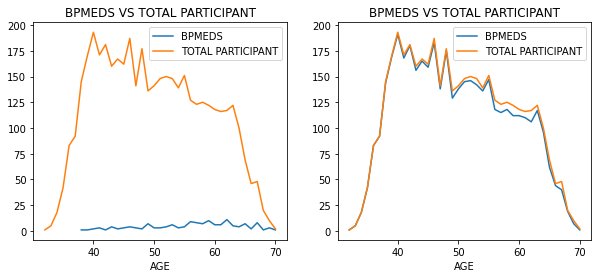

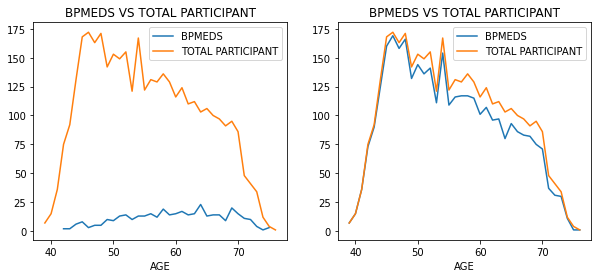

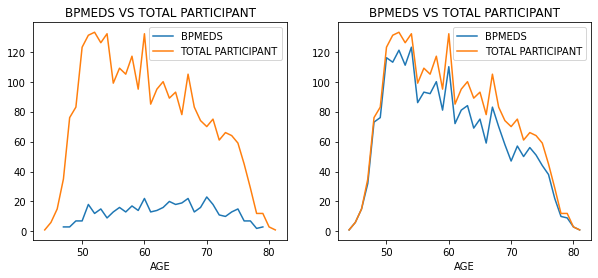

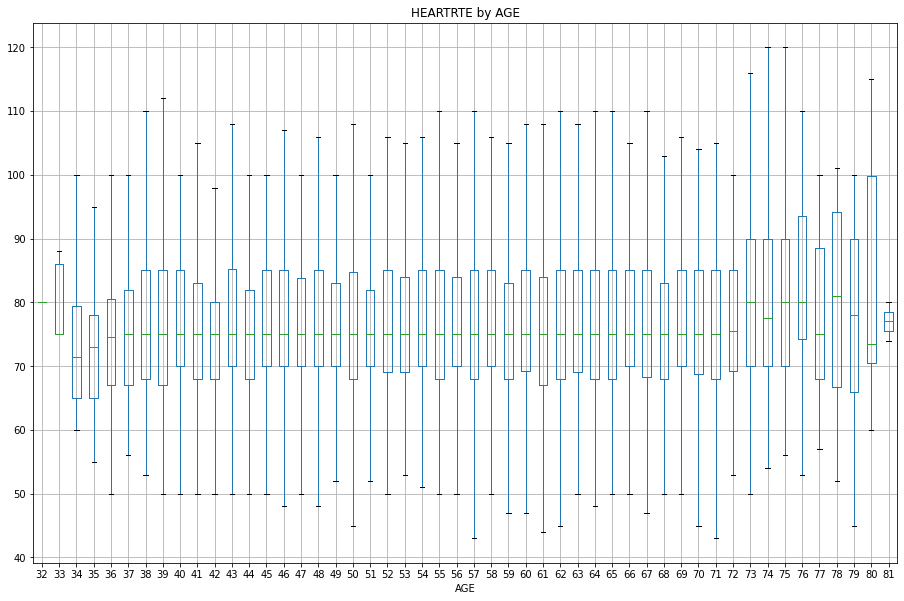

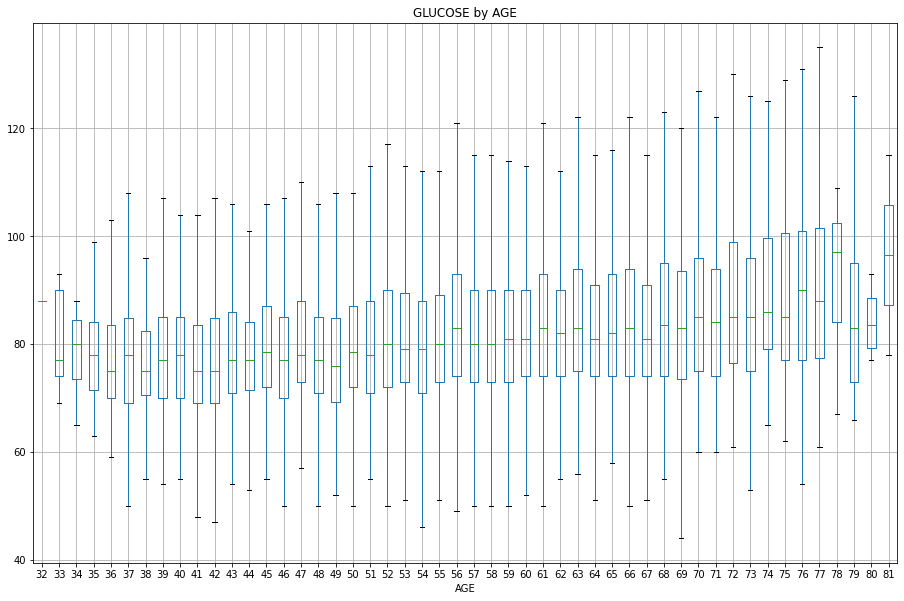

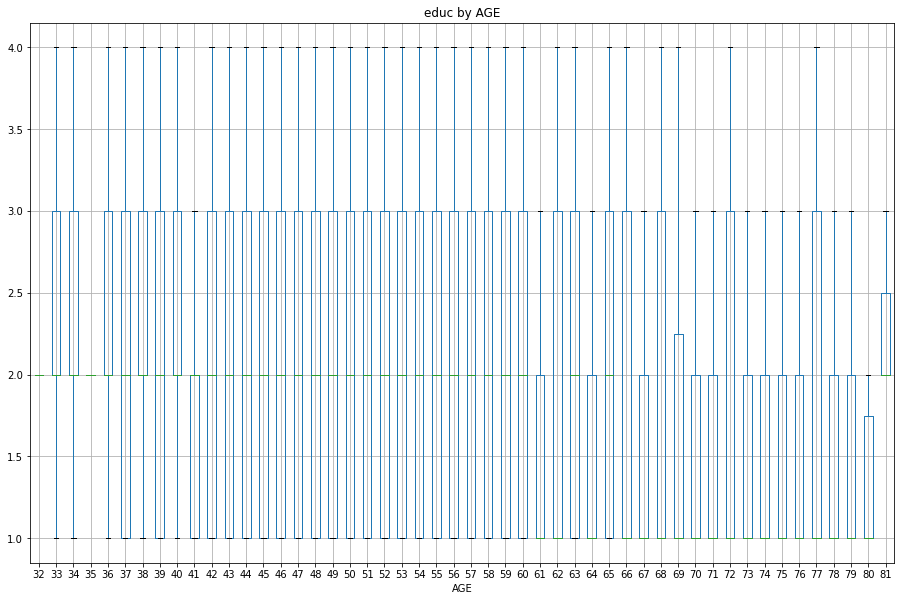

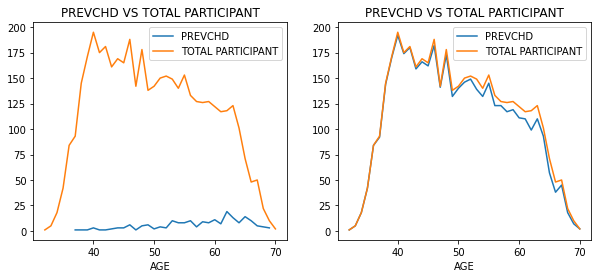

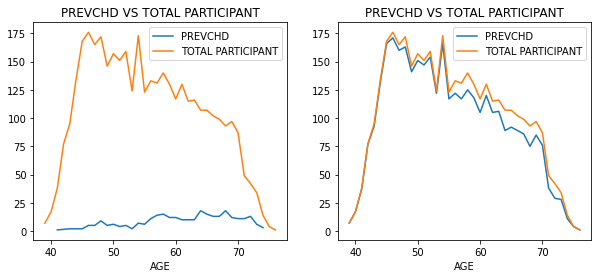

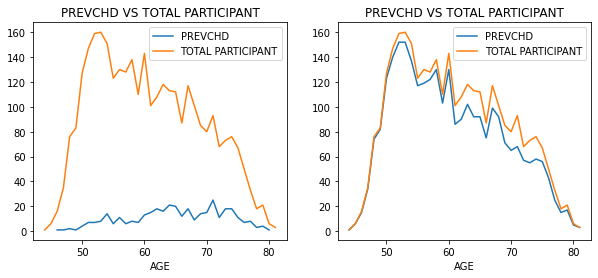

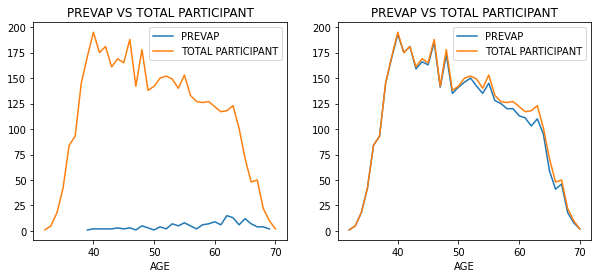

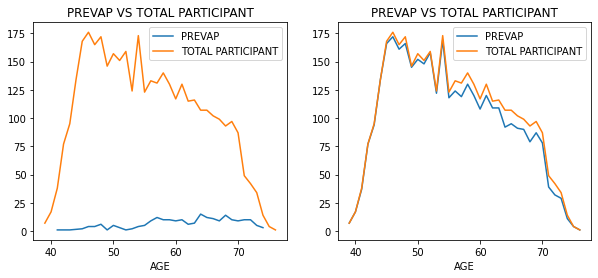

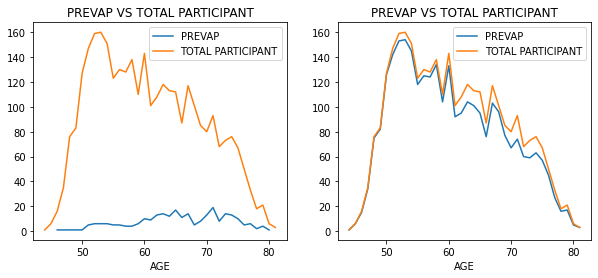

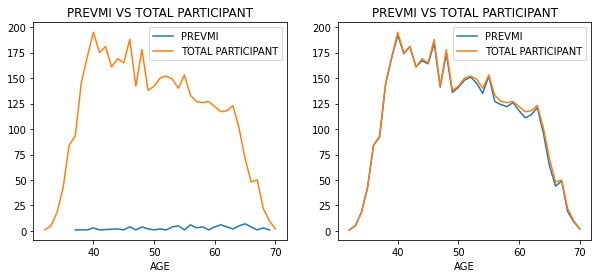

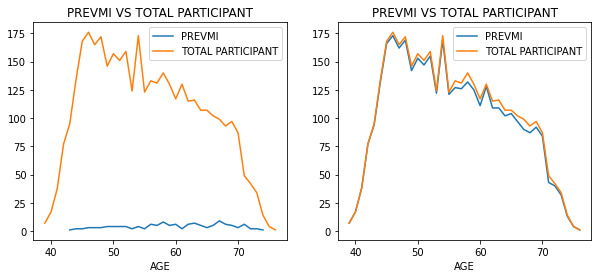

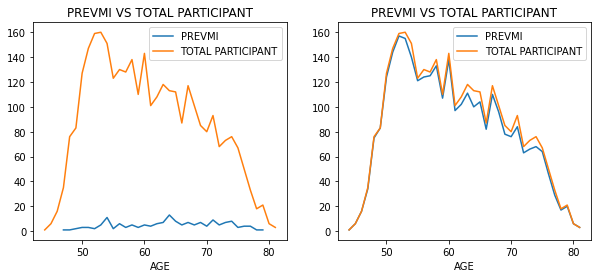

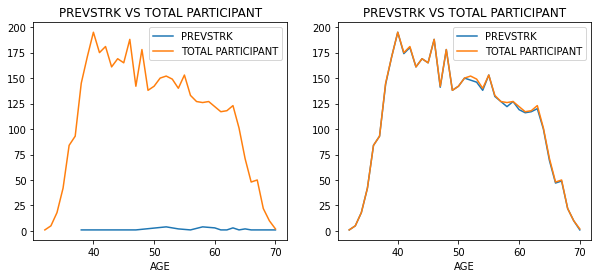

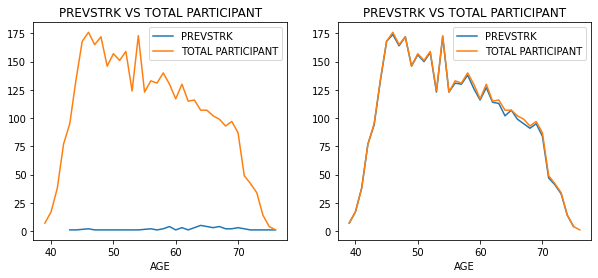

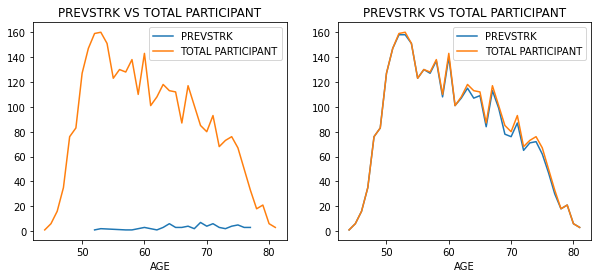

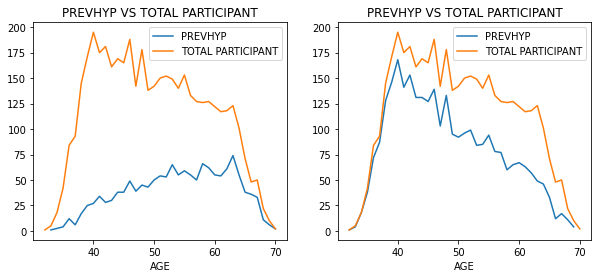

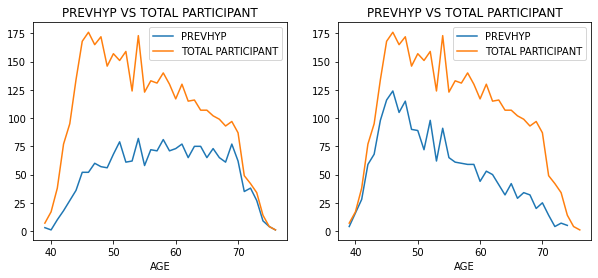

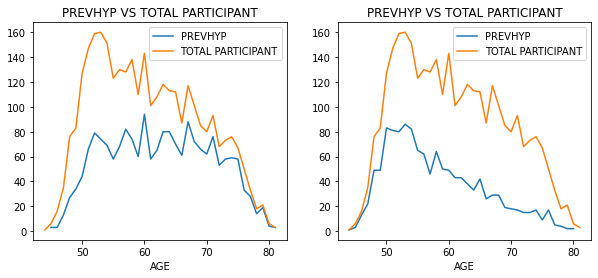

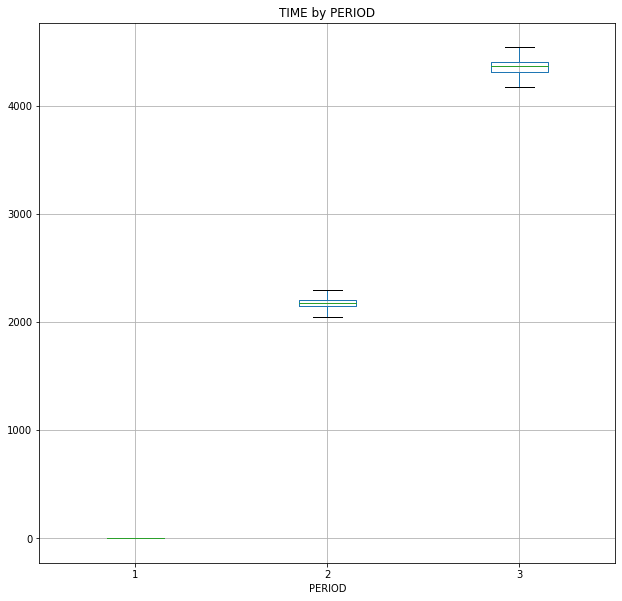

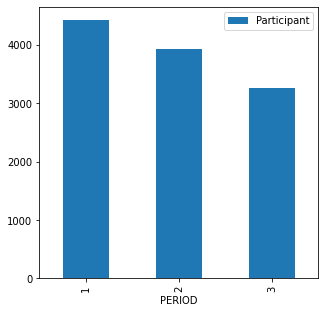

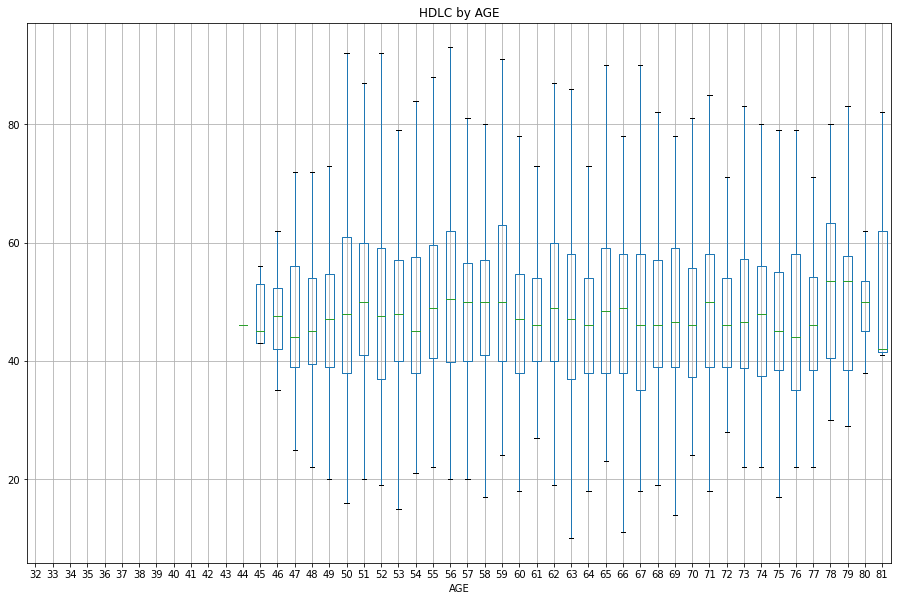

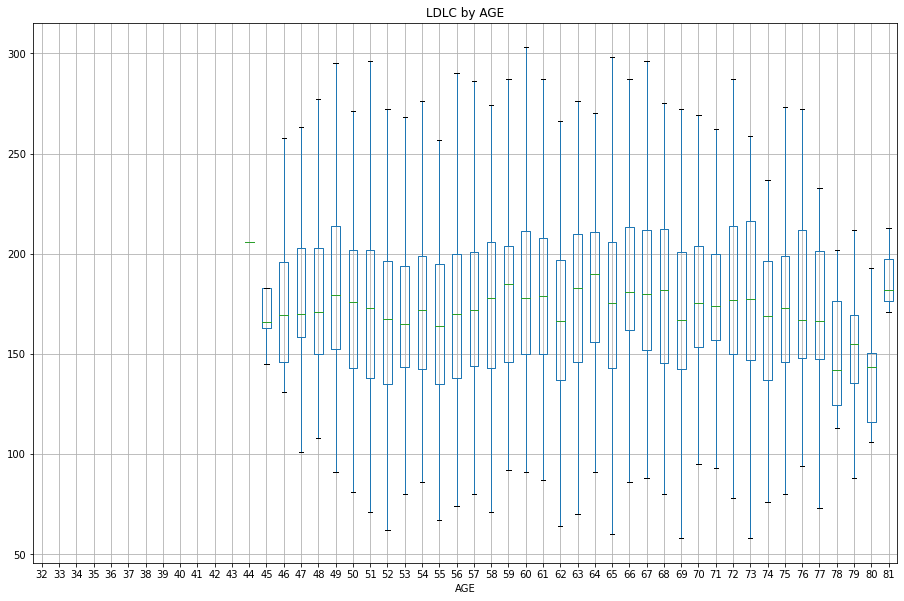

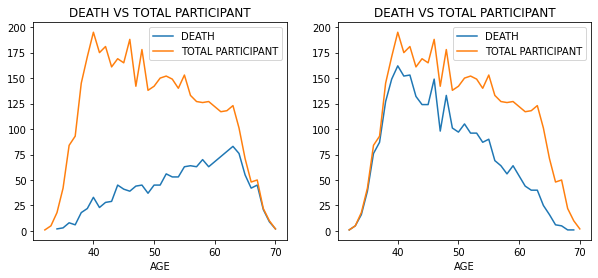

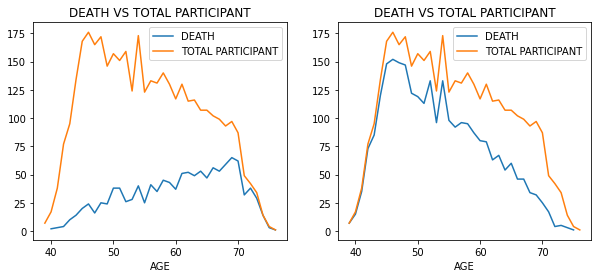

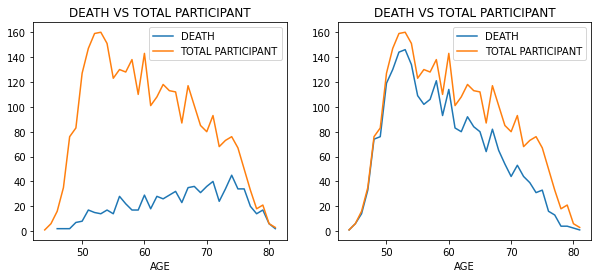

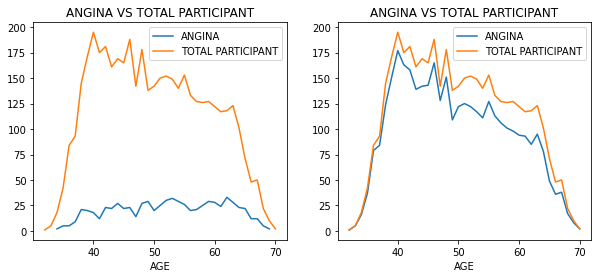

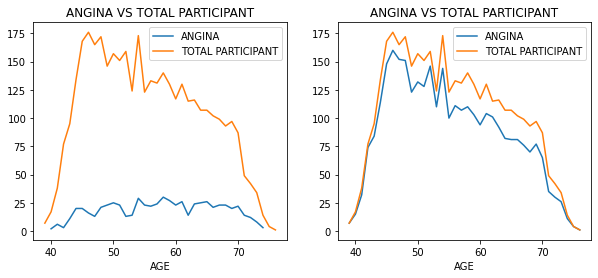

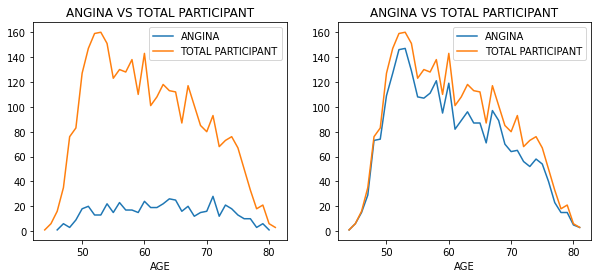

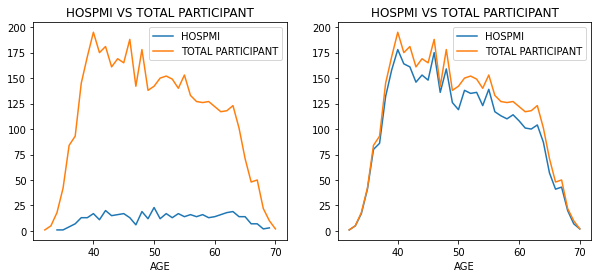

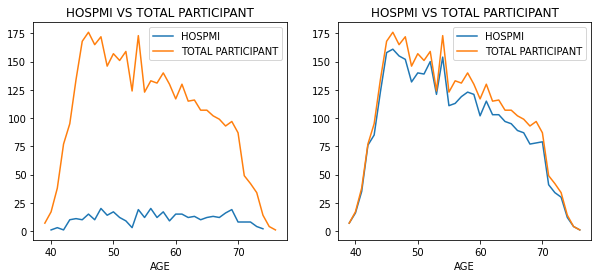

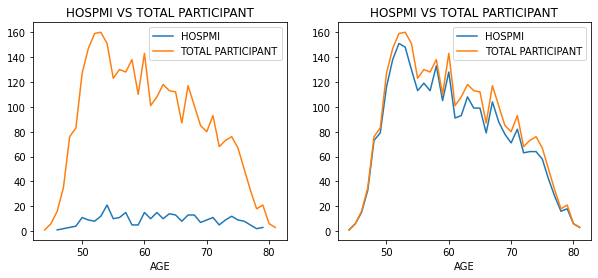

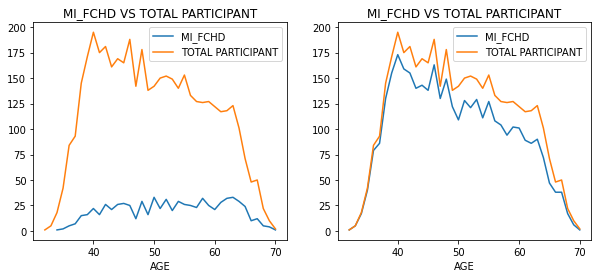

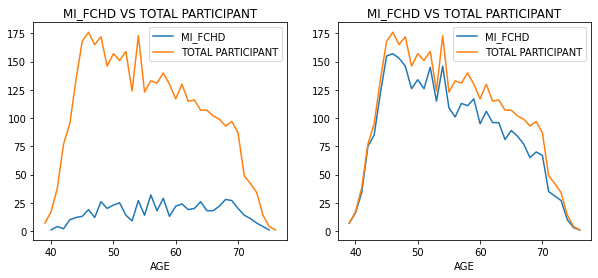

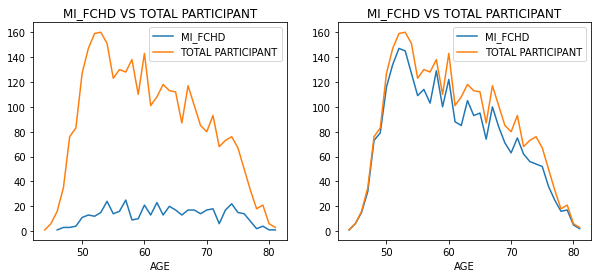

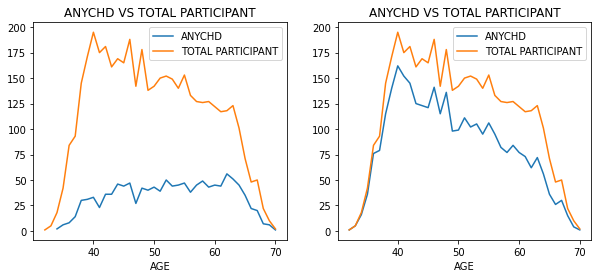

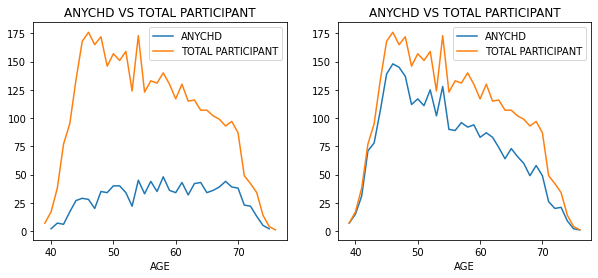

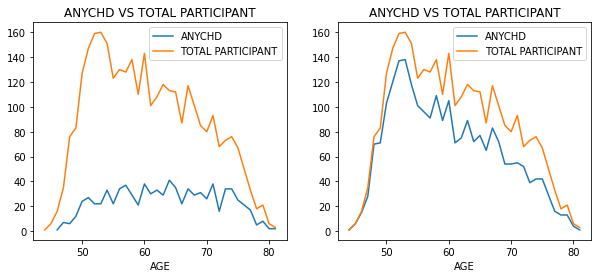

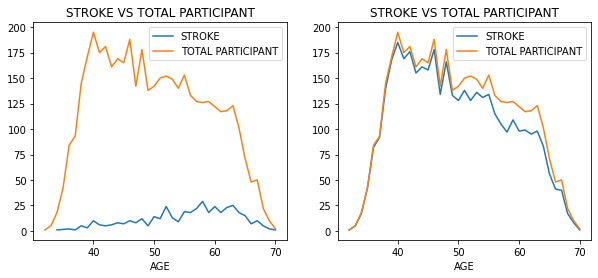

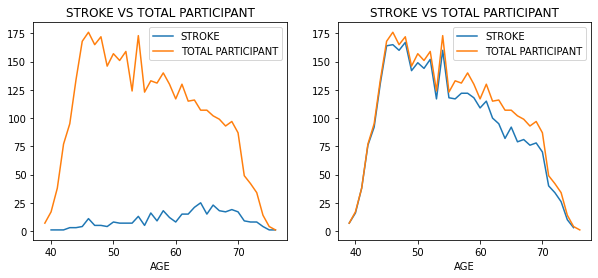

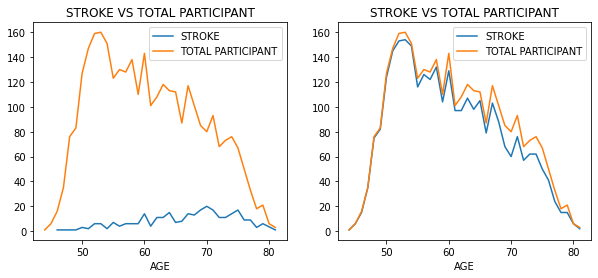

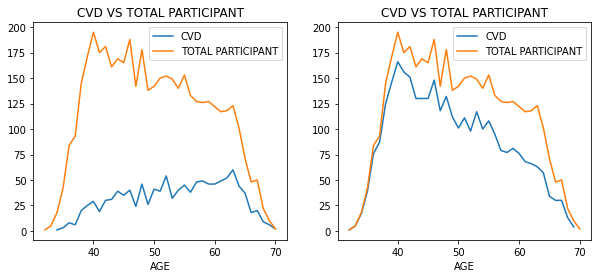

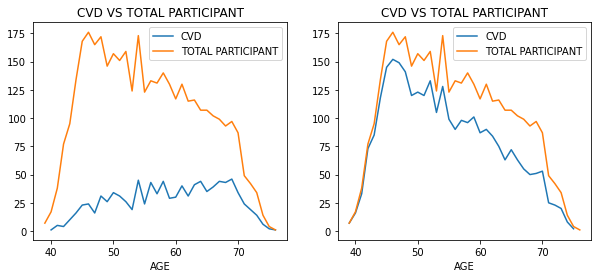

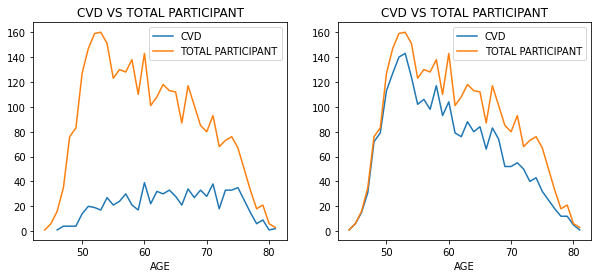

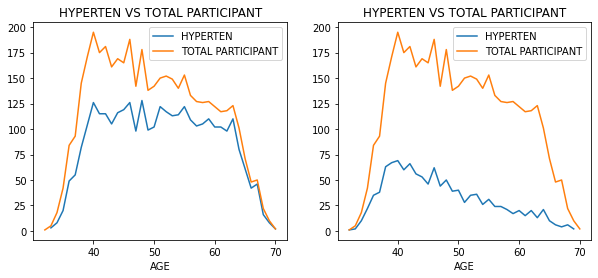

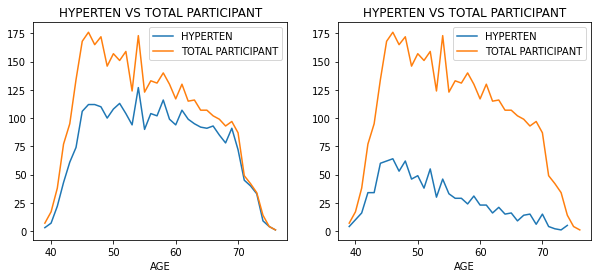

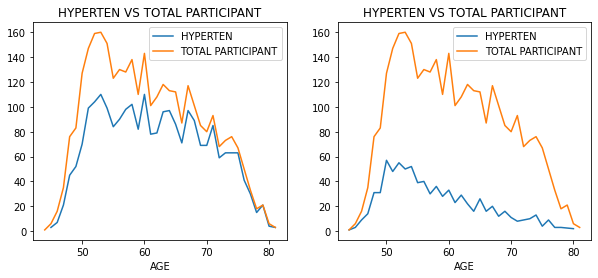

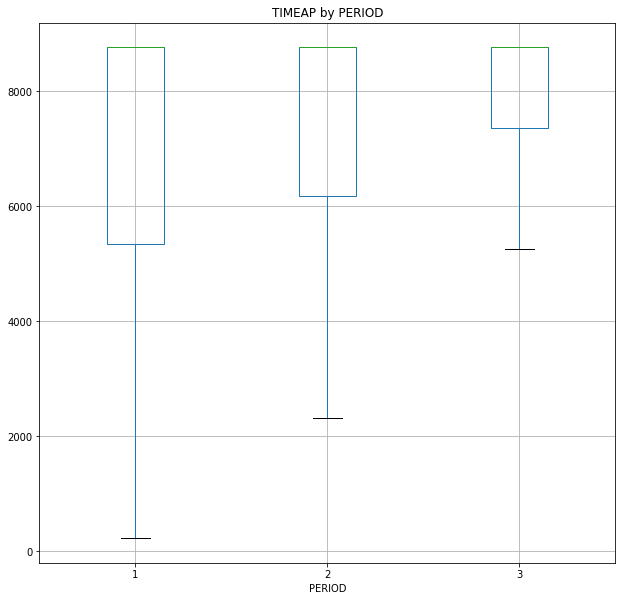

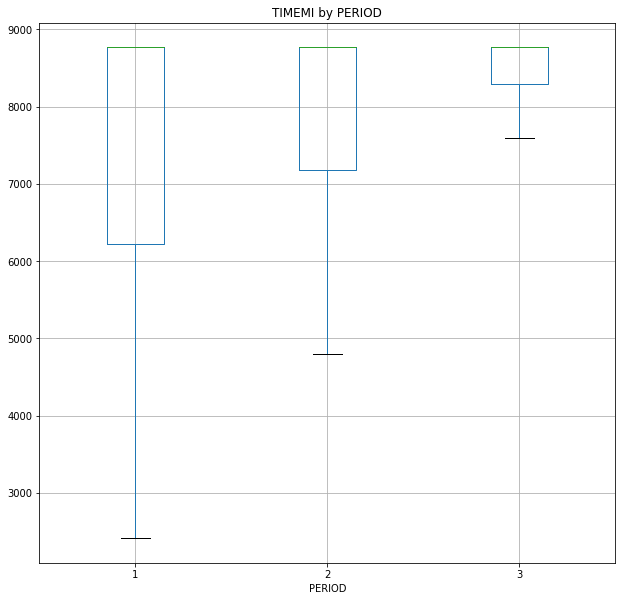

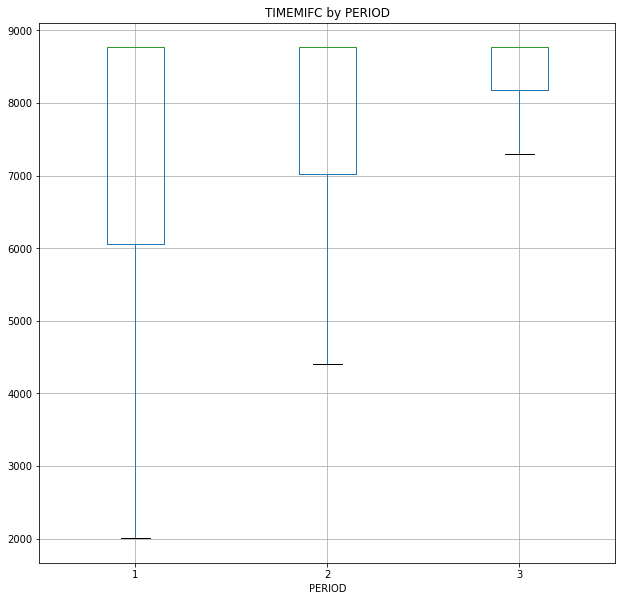

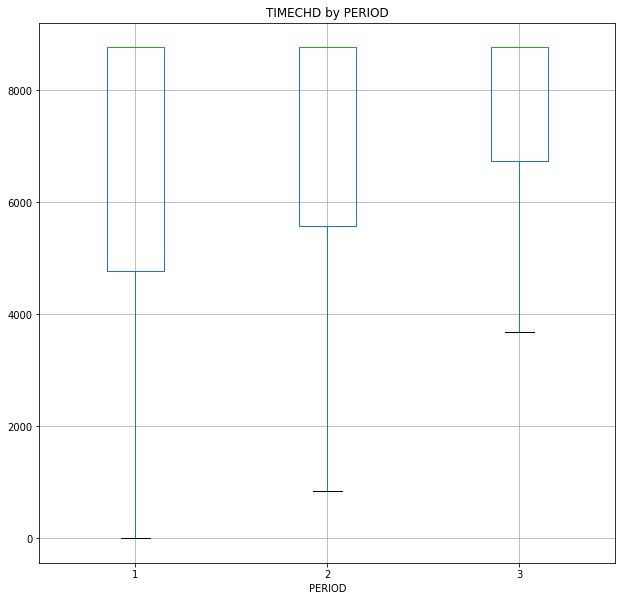

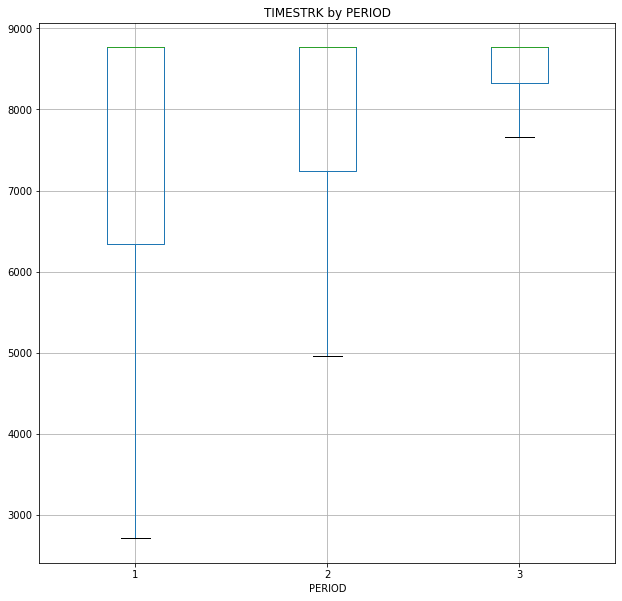

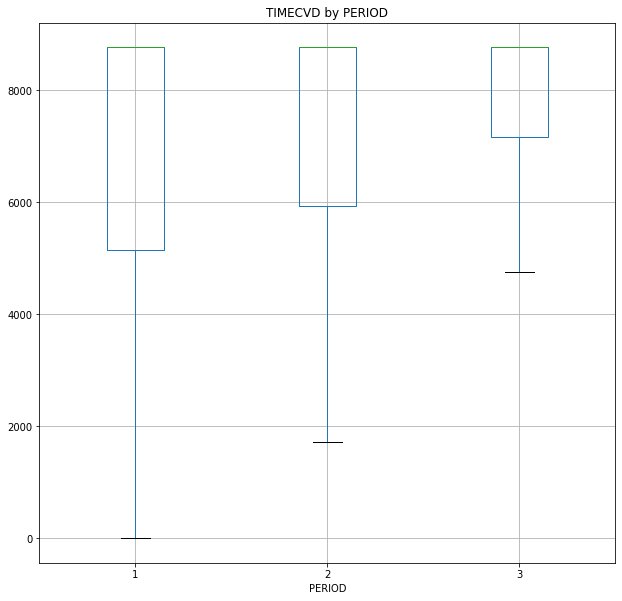

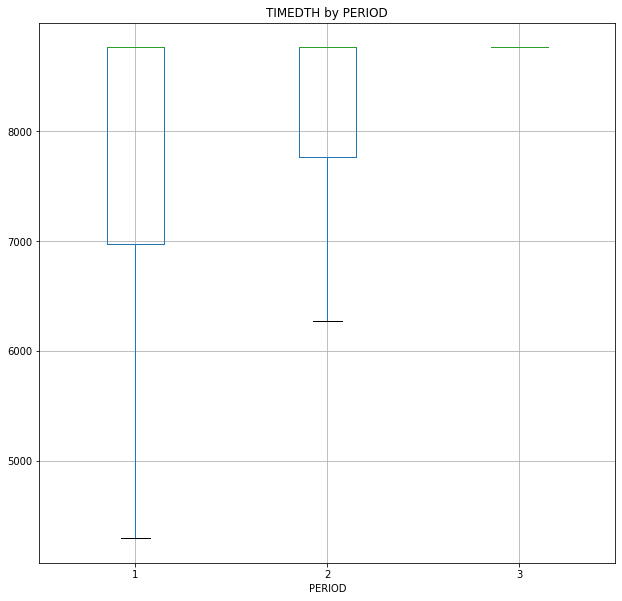

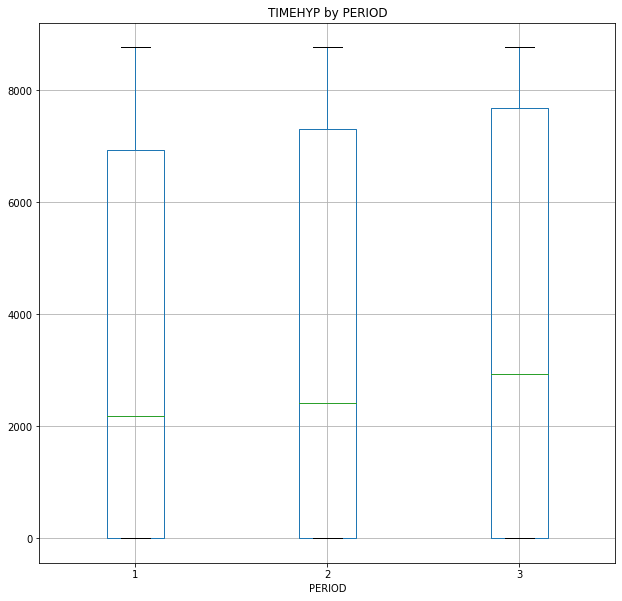

In [124]:
no_need_to_visualized = ['AGE', 'RANDID']
binary_values = ['CURSMOKE', 'SEX', 'DIABETES', 'BPMEDS', 'PREVAP', 'PREVCHD', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'DEATH']
bar_visualization = ['PERIOD']
time_data = ['TIME', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEHYP', 'TIMEDTH']

for col_names in data.columns:
    if col_names in no_need_to_visualized:
        continue
        
    elif col_names in binary_values:
        for period in range(1,4):
            fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

            binary_data = data.loc[(data.PERIOD == period), ['AGE', col_names] ]
            ax1 = binary_data[binary_data[col_names] == 1].groupby('AGE').count().plot(ax=ax1)
            binary_data.groupby('AGE').count().plot(ax=ax1, title=col_names + " VS TOTAL PARTICIPANT", label="x")
            ax1.legend([col_names, "TOTAL PARTICIPANT"])

            binary_data = data.loc[(data.PERIOD == period), ['AGE', col_names] ]
            ax2 = binary_data[binary_data[col_names] == 0].groupby('AGE').count().plot(ax=ax2)
            binary_data.groupby('AGE').count().plot(ax=ax2, title=col_names + " VS TOTAL PARTICIPANT", label="x")
            ax2.legend([col_names, "TOTAL PARTICIPANT"])
        
    elif col_names in bar_visualization:
        bar_visualization_data = data.loc[:, ['AGE', 'PERIOD'] ]
        ax = bar_visualization_data.groupby('PERIOD').count().plot(figsize=(5, 5), kind='bar')
        ax.legend(["Participant"])
        
    elif col_names in time_data:
        data.loc[:, ['PERIOD', col_names] ].boxplot(column=[col_names], by='PERIOD', figsize=(10, 10), showfliers=False)
        plt.title(col_names + " by PERIOD")
        plt.suptitle('')
        
    else:
        data.loc[:, ['AGE', col_names] ].boxplot(column=[col_names], by='AGE', figsize=(15, 10), showfliers=False)
        plt.title(col_names + " by AGE")
        plt.suptitle('')
